In [2]:
setwd("C:/Kaggle/Allstate Claims")

In [2]:
list.files()

[1] "sample_submission.csv"     "sample_submission.csv.zip"
[3] "test.csv"                  "test.csv.zip"             
[5] "train.csv"                 "train.csv.zip"

In [3]:
indata <- read.csv("train.csv")

In [4]:
dim(indata)

[1] 188318    132

In [8]:
str(indata[c(50:132)])

'data.frame':	188318 obs. of  83 variables:
 $ cat49 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ cat50 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 2 ...
 $ cat51 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ cat52 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 2 ...
 $ cat53 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ cat54 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ cat55 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ cat56 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ cat57 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ cat58 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ cat59 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ cat60 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ cat61 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ cat62 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ cat63 : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ cat64 : 

#### There are 132 features. Loss is the variable that is continuous. Its the one we need to predict. There are many categorical features and continuous features.

#### Some features like cat110 and cat116 have too many levels. 131 and 326. Others like cat112 and cat113 do have many levels. Need to see how we can handle them

In [38]:
names(indata)[118:131]

[1] "cont1"  "cont2"  "cont3"  "cont4"  "cont5"  "cont6"  "cont7"  "cont8" 
 [9] "cont9"  "cont10" "cont11" "cont12" "cont13" "cont14"

In [49]:
install.packages("gridExtra",repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/venkata.rao/Documents/R/win-library/3.2'
(as 'lib' is unspecified)


package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\venkata.rao\AppData\Local\Temp\RtmpkhgBMV\downloaded_packages


In [50]:
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 3.2.5"

In [55]:
length(plots)

[1] 14

In [58]:
library(ggplot2)

In [61]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [73]:
install.packages("repr",repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/venkata.rao/Documents/R/win-library/3.2'
(as 'lib' is unspecified)


package 'repr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\venkata.rao\AppData\Local\Temp\RtmpkhgBMV\downloaded_packages


In [75]:
library(repr)

Warning message:
"package 'repr' was built under R version 3.2.5"

ERROR: Error in library(repr): Package 'repr' version 0.10 cannot be unloaded


In [104]:
options(repr.plot.width=15, repr.plot.height=50)

In [105]:
plots <- list()
i <- 1
for(col in 118:132) {
    var = names(indata)[col]
    #print(var)
    p1 <- ggplot(indata,aes_string(x=var,y=var)) + geom_violin(fill="blue")
    plots[[i]] <- p1
    i <- i + 1
}

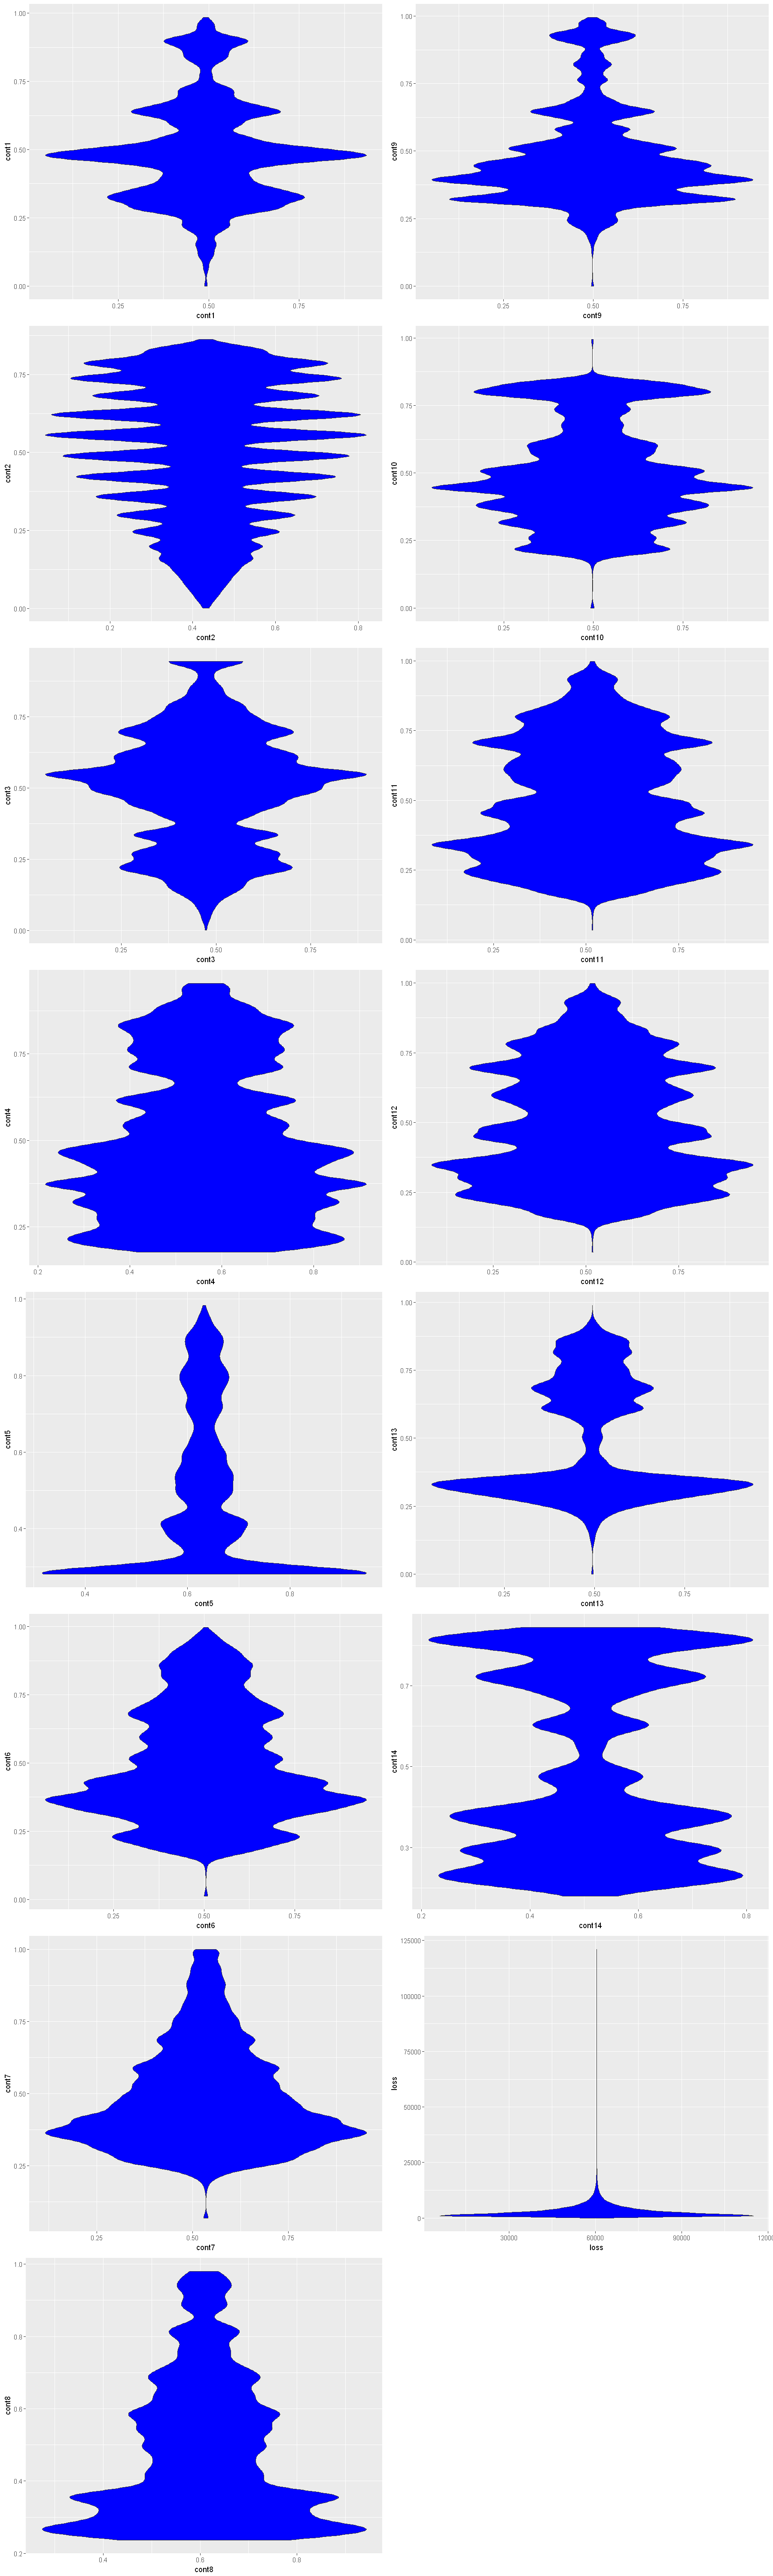

In [106]:
multiplot(plotlist=plots,cols=2)

In [107]:
options(repr.plot.width=7, repr.plot.height=7)

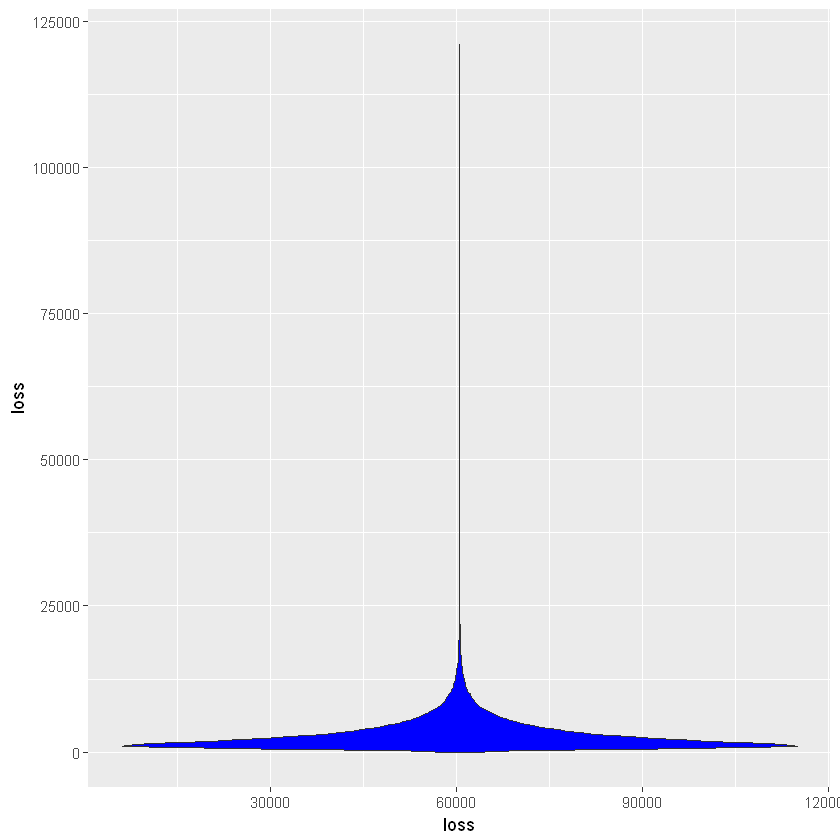

In [109]:
ggplot(indata,aes_string(x="loss",y="loss")) + geom_violin(fill="blue")

#### loss variable is highly skewed.Lets plot a log transformation

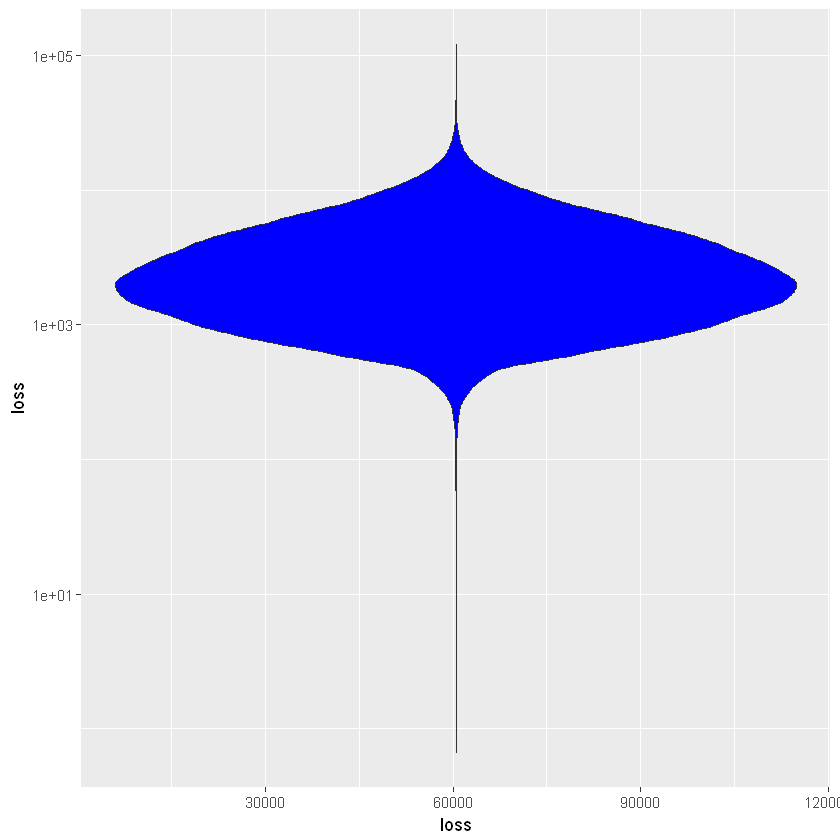

In [108]:
ggplot(indata,aes_string(x="loss",y="loss")) + geom_violin(fill="blue") + scale_y_log10()

In [111]:
corr_mat <- cor(indata[118:131])

In [116]:
install.packages("corrplot",repos = "http://cran.us.r-project.org")
library(corrplot)


Installing package into 'C:/Users/venkata.rao/Documents/R/win-library/3.2'
(as 'lib' is unspecified)
Warning message:
"package 'corrplot' is in use and will not be installed"

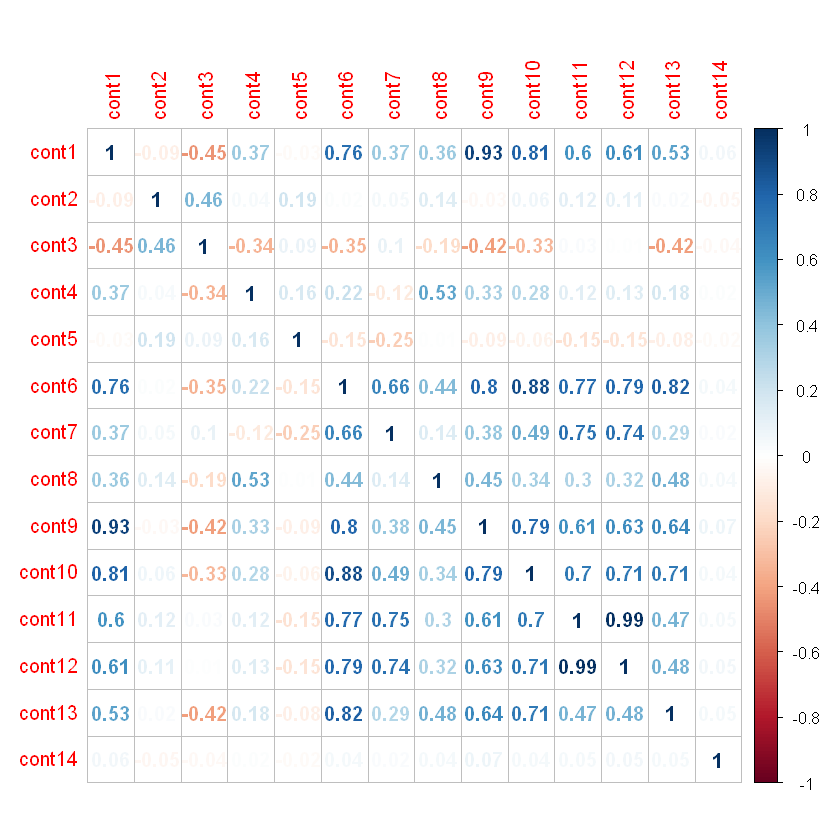

In [117]:
corrplot(corr_mat,method = "number" )

**There appears to be some highly correlated variables<br>
cont1 and cont9,cont10 are highly correlated.  
Similarly cont11 and cont12 are correlated**

## Build a linear Regression

In [124]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.2.5"Loading required package: lattice


In [126]:
inTrain <- createDataPartition(y=indata$loss, p=0.75, list=FALSE)

In [131]:
train <- indata[inTrain,]
test <- indata[-inTrain,]

In [132]:
dim(train)
dim(indata)
dim(test)

[1] 141240    132

[1] 188318    132

[1] 47078   132

In [ ]:
lineamrmodel <- lm(loss ~ ., data = train[-c(1)])

In [ ]:
ls()

In [ ]:
ls()

In [142]:
ls()

[1] "col"          "corr_mat"     "i"            "indata"       "inTrain"     
 [6] "lineamrmodel" "multiplot"    "p1"           "plots"        "test"        
[11] "train"        "var"

In [147]:
head(train[-c(1)])

cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
A,B,A,A,A,A,A,A,B,A,...,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87


In [148]:
lineamrmodel <- lm(loss ~ ., data = train[-c(1)])

In [149]:
save.image("Allstate.RData")

In [150]:
ls()

[1] "col"          "corr_mat"     "i"            "indata"       "inTrain"     
 [6] "lineamrmodel" "multiplot"    "p1"           "plots"        "test"        
[11] "train"        "var"

In [151]:
ls()

[1] "col"          "corr_mat"     "i"            "indata"       "inTrain"     
 [6] "lineamrmodel" "multiplot"    "p1"           "plots"        "test"        
[11] "train"        "var"

In [154]:
summary(lineamrmodel)


Call:
lm(formula = loss ~ ., data = train[-c(1)])

Residuals:
   Min     1Q Median     3Q    Max 
-42802  -1025   -209    702  59400 

Coefficients: (71 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3926.677   3348.390  -1.173 0.240916    
cat1B         -236.975     14.819 -15.991  < 2e-16 ***
cat2B       -56476.989  12830.791  -4.402 1.07e-05 ***
cat3B         1811.418   1984.820   0.913 0.361436    
cat4B        32287.285  16951.514   1.905 0.056823 .  
cat5B        23740.947  11587.778   2.049 0.040484 *  
cat6B         -122.613   3567.588  -0.034 0.972583    
cat7B          787.580  12884.201   0.061 0.951258    
cat8B         3193.504    666.780   4.789 1.67e-06 ***
cat9B         9638.487   2136.360   4.512 6.44e-06 ***
cat10B        9849.847   2136.313   4.611 4.02e-06 ***
cat11B        9788.324   2136.295   4.582 4.61e-06 ***
cat12B       10383.892   2136.227   4.861 1.17e-06 ***
cat13B        9762.246   2136.279   4.

In [2]:
load("Allstate.RData")

In [3]:
ls()

[1] "bestmodel"    "coeff"        "col"          "corr_mat"     "cv.out"      
 [6] "i"            "indata"       "inTrain"      "lineamrmodel" "multiplot"   
[11] "p1"           "plots"        "pp"           "test"         "testx"       
[16] "train"        "var"          "x"            "y"

In [5]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-2



In [ ]:
library(glmnet)

x <- model.matrix(loss ~ ., data = train)
y <- train$loss
testx <- model.matrix(loss ~ ., data = test)

set.seed(1)
cv.out <- cv.glmnet(x, y, alpha=0, nlambda=100, lambda.min.ratio=0.0001,type.measure = "mae")
bestmodel <-glmnet(x,y,lambda=cv.out$lambda.min)


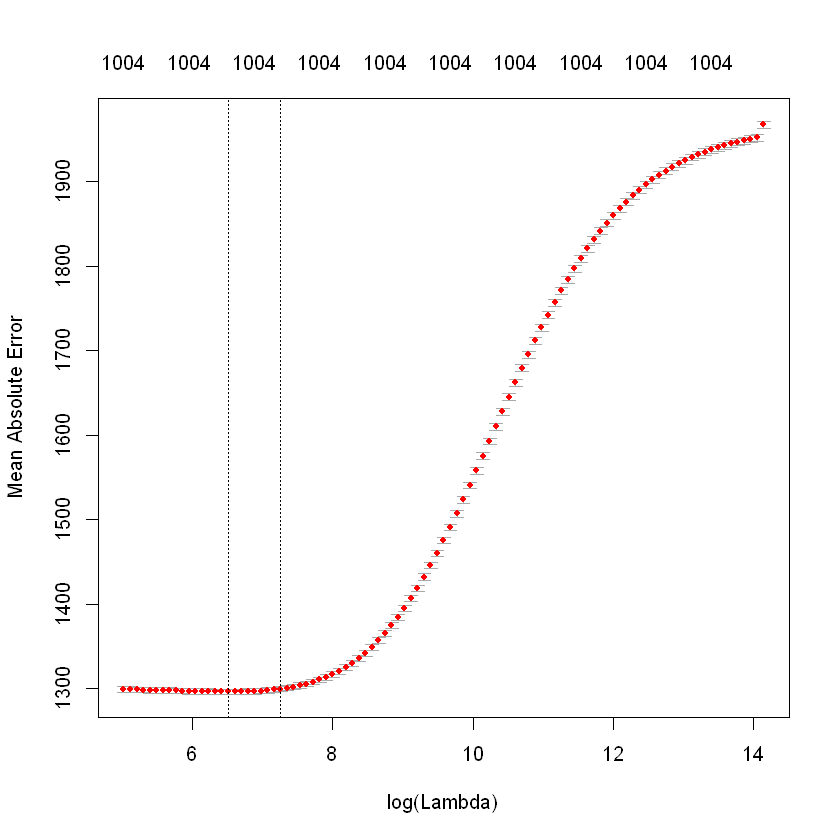

In [6]:
plot(cv.out)

In [ ]:
pp <- predict(bestmodel,newx = testx)

test$predicted <- pp
test$error <- test$loss - test$predicted


In [9]:
mean(abs(test$error))

[1] 1686.113

** Ridge Regression error is 1686 **

### Lasso Regresssion using glmnet 

In [10]:
# lasso. we have to choose alpha as 1
set.seed(1)
cv.out.lasso <- cv.glmnet(x, y, alpha=1, nlambda=100, lambda.min.ratio=0.0001,type.measure = "mae")



In [14]:
bestmodel.lasso <-glmnet(x,y,lambda=cv.out.lasso$lambda.min)

In [16]:
test$predicted_lasso <- predict(bestmodel.lasso,newx = testx)

In [17]:
test$error_lasso <- test$loss - test$predicted_lasso

In [18]:
mean(abs(test$error_lasso))

[1] 1298.131

** Lasso Regression does better than Ridge.**

In [21]:
head(train[-c(1)])

cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
A,B,A,A,A,A,A,A,B,A,...,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87


In [22]:
library(rpart)

# growing regression tree 
rpart.fit <- rpart(loss ~.,method="anova", data=train[-c(1)])

In [23]:
printcp(rpart.fit)


Regression tree:
rpart(formula = loss ~ ., data = train[-c(1)], method = "anova")

Variables actually used in tree construction:
[1] cat100 cat116 cat12  cat57  cat79  cat80  cont2  cont7 

Root node error: 1.1852e+12/141240 = 8391207

n= 141240 

        CP nsplit rel error  xerror     xstd
1 0.231280      0   1.00000 1.00001 0.016611
2 0.048707      1   0.76872 0.76876 0.014946
3 0.031750      2   0.72001 0.72011 0.014674
4 0.016675      3   0.68826 0.68837 0.014456
5 0.015043      4   0.67159 0.67298 0.014513
6 0.013322      5   0.65654 0.66170 0.014254
7 0.011471      6   0.64322 0.65791 0.014224
8 0.010427      7   0.63175 0.64836 0.013819
9 0.010000      8   0.62132 0.63676 0.013782


In [24]:
prune.fit<- prune(rpart.fit, cp=0.01) 

In [27]:
ls()

[1] "bestmodel"       "bestmodel.lasso" "coeff"           "col"            
 [5] "corr_mat"        "cv.out"          "cv.out.lasso"    "i"              
 [9] "indata"          "inTrain"         "lineamrmodel"    "multiplot"      
[13] "p1"              "plots"           "pp"              "prune.fit"      
[17] "rpart.fit"       "test"            "testx"           "train"          
[21] "var"             "x"               "y"

In [28]:
dim(testx)

[1] 47078  1039

In [30]:
test$predict_rpart <- predict(prune.fit,newdata = test)

In [37]:
length(test$loss)

[1] 47078

In [41]:
test$rpart.error <- test$loss-test$predict_rpart

In [42]:
mean(abs(rpart.error))

[1] 1485.56

** rpart error 1485 **

## Building a random forest model

In [7]:
library(caret)
maeSummary <- function (data,
                        lev = NULL,
                        model = NULL) {
   library(Metrics)
   out <- mae(data$obs, data$pred)  
   names(out) <- "MAE"
   out
}


Warning message:
"package 'caret' was built under R version 3.2.5"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.2.5"

In [ ]:
control <- trainControl(method="repeatedcv", number=10, repeats=3, summaryFunction = maeSummary,classProbs = FALSE)
set.seed(1234)
tunegrid <- expand.grid(.mtry=c(5:20))
rf_gridsearch <- train(loss~., data=train[-c(1)], method="rf", metric="MAE", tuneGrid=tunegrid, trControl=control)

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Warning message in train.default(x, y, weights = w, ...):
"cannnot compute class probabilities for regression"

In [4]:
load("Allstate.RData")

In [6]:
head(test)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,predicted,error
9,23,A,B,B,B,B,A,A,A,B,...,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20,4758.068,5522.1317
10,24,A,B,A,A,B,B,A,A,B,...,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59,3732.274,2452.3155
22,60,A,A,A,B,A,B,A,A,A,...,0.81542,0.32311,0.36458,0.453334,0.454705,0.651733,0.354002,891.14,2584.652,-1693.5122
25,73,B,A,A,A,A,A,A,A,A,...,0.33906,0.47900,0.54433,0.812519,0.800726,0.246011,0.215055,7256.49,3200.790,4055.6997
28,89,B,A,A,B,A,A,A,A,A,...,0.36083,0.44352,0.45017,0.291268,0.295524,0.339244,0.804795,2163.97,2584.652,-420.6822
30,93,A,A,A,A,B,A,A,A,A,...,0.34445,0.52728,0.79139,0.377724,0.369858,0.687115,0.297788,1753.50,2584.652,-831.1522
